<a href="https://colab.research.google.com/github/maltaro/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  return (prob_drunk_prior/(prob_drunk_prior + (false_positive_rate*(1-prob_drunk_prior))))

In [4]:
prob_drunk_given_positive(0.001, 0.08)

0.012357884330202669

In [0]:
# regarding the second and third task of question 1. it makes sense to think 
# about the counterexample: what is the likelihood of somebody being 
# tested positive and not being drunk:


In [0]:
def prob_not_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  return ((false_positive_rate*(1-prob_drunk_prior))/
         (prob_drunk_prior +(false_positive_rate*(1-prob_drunk_prior))))

In [6]:
prob_not_drunk_given_positive(0.001, 0.08)

0.9876421156697973

In [7]:
prob_drunk_given_positive(0.001, 0.08) +  prob_not_drunk_given_positive(0.001, 0.08)

1.0

In [0]:
# as we can see prob_drunk_given_positive + prob_not_drunk_given_positive = 1
# this is of course the expected result as either the one or the other event 
# can take place and there is no third possible event. 


In [0]:
# now we need to consider what the likelihood is that somebody is tested 
# positive x times and not drunk. We will use a modified version of the function 
#  above:


In [0]:
def prob_not_drunk_given_positive_x_times(prob_drunk_prior, false_positive_rate,x):
  return ((false_positive_rate*(1-prob_drunk_prior))/
         (prob_drunk_prior +(false_positive_rate*(1-prob_drunk_prior))))**x

In [10]:
1 - prob_not_drunk_given_positive_x_times(0.001, 0.08, 2)

0.02456305135528669

In [0]:
# here we chained the probabiity of being tested positive and not being drunk
# twice and subtracted the result from 1. The result is the probability that 
#  somebody got testet positive twice and actually is drunk. 

In [0]:
# to solve the last task of question one we will modify the function from above 
#  once again a bit. 


In [0]:
def prob_drunk_given_positive_x_times(prob_drunk_prior, false_positive_rate,x):
  print(x)
  print(1-((false_positive_rate*(1-prob_drunk_prior))/
         (prob_drunk_prior +(false_positive_rate*(1-prob_drunk_prior))))**x)

In [18]:
for x in range(240,245):
  prob_drunk_given_positive_x_times(0.001, 0.08,x)

240
0.9494286824486916
241
0.9500536369414166
242
0.9506708683188089
243
0.9512804720222344
244
0.9518825423136057


In [0]:
# somebody needs to be tested positive 241 times to be 95%
# sure that he actually is drunk. That is honestly a bit of a suprising result.

In [0]:
import pandas as pd
import scipy.stats
import seaborn as sns

In [0]:
tips = sns.load_dataset("tips")

In [53]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [0]:
## calculation of the confidence interval using the Bayesian approach

In [0]:
 mean,var,std = scipy.stats.bayes_mvs(tips["tip"], alpha=0.9)

In [0]:
mean = list(mean)

In [56]:
mean

[2.99827868852459, (2.8520226737233187, 3.144534703325861)]

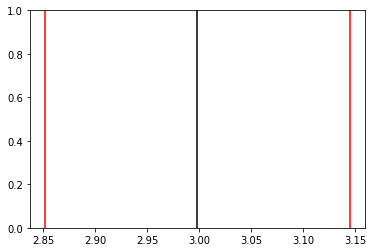

In [57]:
import matplotlib.pyplot as plt

plt.axvline(x=mean[1][0], color='red')
plt.axvline(x=mean[1][1], color='red')
plt.axvline(x=mean[0], color='k');



In [0]:
# calculation of the confidence interval using the frequentist approach 


In [0]:
import numpy as np
from scipy import stats

In [0]:
standard_deviation = np.std(tips["tip"], ddof=1)

In [0]:
standard_error = standard_deviation / (len(tips["tip"])**0.5)

In [0]:
t_statistic = stats.t.ppf(0.95, len(tips["tip"]) - 1)
# since alpha is 0.9 we calculate (0.9 +1)/2 = 0.95

In [0]:
margin_of_error = t_statistic * standard_error

In [0]:
tips_mean = tips["tip"].mean()

In [0]:
confidence_interval = [tips_mean - margin_of_error, tips_mean, tips_mean+margin_of_error]

In [0]:
CI = confidence_interval

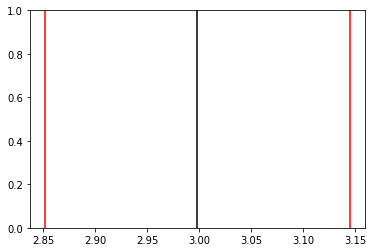

In [70]:
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

In [0]:
# Both methods yield very similar results. Apparently the dataset 
# is big enough to even out the differences between both approaches. 

I read the provided blogpost on Bayes Theorem but I did not understand it completely since parts of the notation were obscure. In general I would saz that Bayesian statistics always examines a given dataset under a certain condition while frequentist statistic is only interested in the dataset itself. 


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!